In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
from helper import get_highest_rated, get_most_popular
from plotting import plot

In [2]:
reader = Reader()
svd_data = pd.read_csv('data/data.csv')
data = Dataset.load_from_df(svd_data, reader)
data_train  = data.build_full_trainset()
algo = SVD(n_factors=10, n_epochs=100, biased=True, lr_all = 0.01, reg_all = 0.1)
algo.fit(data_train)

In [3]:
V = algo.qi.transpose()
A = np.linalg.svd(V)[0]
V_proj = np.dot(A[:, :2].transpose(), V)
V_proj /= V_proj.std(axis=1).reshape(2, 1)

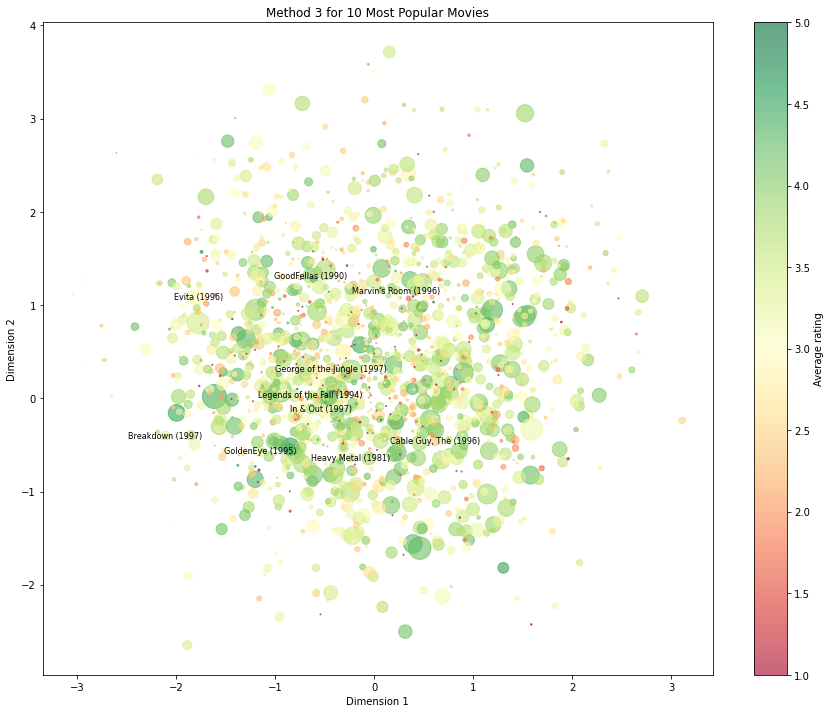

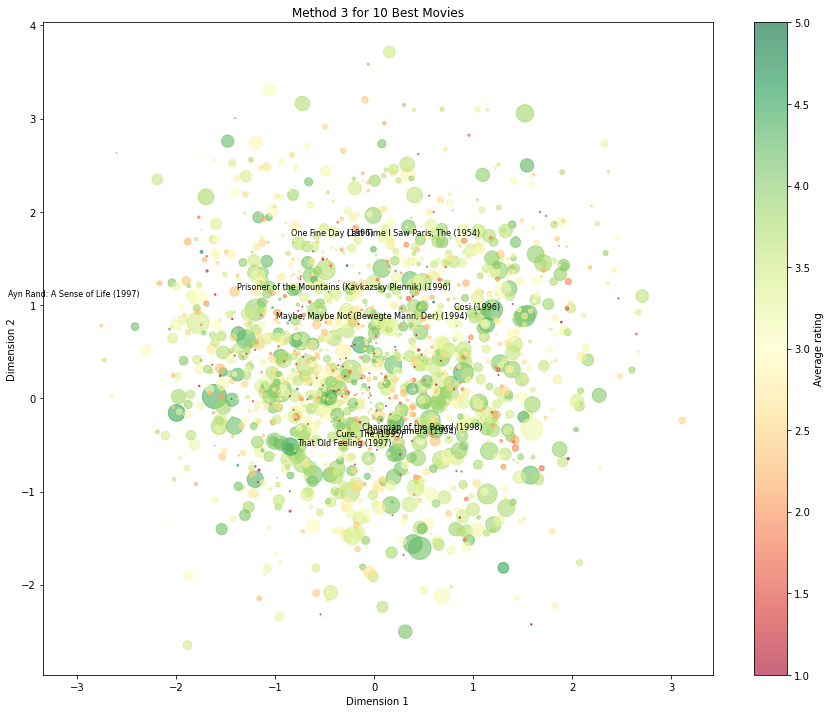

In [4]:
ten_popular = get_most_popular()[:10]
ten_best = get_highest_rated()[:10]
plot(V_proj, ten_popular, 'Method 3 for 10 Most Popular Movies')
plot(V_proj, ten_best, 'Method 3 for 10 Best Movies')